Monte Carlo Simulations are used to predict the outcomes from random processes or events. For example we can look at the distance a coin will fall in a plinko board. A plinko board has rows of pegs sticking out from the board face. A coin is dropped from the top of the board and as it slides down, it is deflected left or right by the pegs.


In [101]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Plinko:
    
    def __init__(self):
        self.position = 0 # Start at the center of the board
        self.history = [self.position] # Keep track of our history
        
    def step(self):
        """
        On each step we use a number taken from a uniform discrete distribution between 0 and 1 as our random variable, pr. For
        this plinko board, there are only two options, move left (negative) or move right (positive). 
        """
        pr = random.randint(0,1)
        if pr ==0: # Does it matter if you do < or <=? With very high precision the effect will be small (essentially 0!)
            self.position += .5
        else:
            self.position +=-.5
        self.history.append(self.position)

    def simulate(self, steps):
        """
        In this simulation we are interested stepping, or random walk simulation. For our plinko board, steps
        will be the number of pegs on our plinko board.
        """
        self.reset()
        for i in range(steps):
            self.step()
        return self.position
        
    def reset(self):
        """
        In MonteCarlo we will run the simulation thousands of times, so we define the starting conditions for the simulation
        here. 
        """
        self.position = 0
        self.history = [self.position]

    

Above we created a class to simulate our Plinko board. We can create a Plinko simulation object, and run the method simulate to determine how far a coin would have gone in that simulation

In [102]:
game = Plinko()
game.simulate(100)


2.0

One useful way to explore the simulation data is to map out the path travelled of our coin during the simulation. 

Text(0.5, 0, 'Step #')

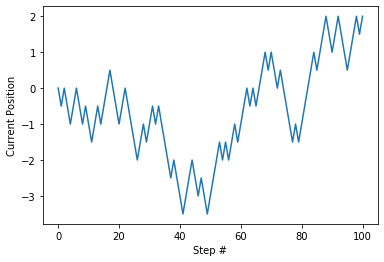

In [103]:
fig, ax = plt.subplots()
ax.plot(game.history)
ax.set_ylabel('Current Position')
ax.set_xlabel('Step #')

A monte carlo simulation will rely on thousands and hundres of thousands of simulations to increase the accuracy (or decrease the variance) of our results. We will create a a MonteCarlo object that we can call for the Plinko simulation.

In [104]:
class MonteCarlo:
    """
    We will try to use this monte carlo class for many of our simulations. It will restore a list of outcomes as a 
    field titled "results". 
    
    Later we will update this to include the multiprocessing module to run our simulations faster.
    """
    
    def __init__(self):
        self.results = []
    
    def run(self,simulation_object, number_of_simulations, *args, **kwargs):
        """
        Pass a simulation object (our Plink Class for example), the number of times to run the MC simulation, and any arguments 
        keyword arguments that are necessary for the simulate command of the simulation object
        
        """
        
        self.results = [simulation_object.simulate(*args,**kwargs) for i in range(number_of_simulations)]
        
            

In [105]:
mc = MonteCarlo()
num_steps = 10
num_sims = [10,100,1000,10000,100000]
for N in num_sims:
    mc.run(game,N, num_steps)
    print(f"Mean ending location for {N} simulations and 100 steps is: {np.mean(mc.results):} +/- {np.std(mc.results):.4f}")

Mean ending location for 10 simulations and 100 steps is: -0.2 +/- 1.7776
Mean ending location for 100 simulations and 100 steps is: 0.08 +/- 1.6534
Mean ending location for 1000 simulations and 100 steps is: -0.01 +/- 1.6018
Mean ending location for 10000 simulations and 100 steps is: 0.0008 +/- 1.5603
Mean ending location for 100000 simulations and 100 steps is: -0.00585 +/- 1.5795


As we increase the number of simulations we get closer to the true mean (Zero for this "fair-game"). The standard deviation (or square root of the variance) also becomes better defined. For the plinko game, our result is a gaussian distribution centered about zero. We can plot a histogram of the results to confirm this: 

Text(0.5, 0, 'Distance Travelled (arbitrary units)')

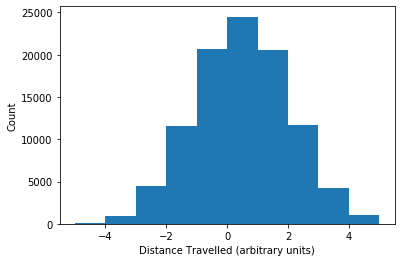

In [106]:
fig, ax = plt.subplots()
ax.hist(mc.results)
ax.set_ylabel('Count')
ax.set_xlabel('Distance Travelled (arbitrary units)')

We can plot the cumulitive distribution function using the histogram above:


Text(0.5, 0, 'Distance  (arbitrary units)')

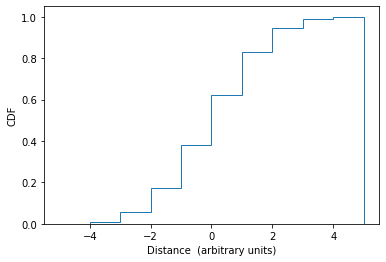

In [107]:
fig, ax = plt.subplots()
ax.hist(mc.results, cumulative=True, density=True, histtype='step')
ax.set_ylabel('CDF')
ax.set_xlabel('Distance  (arbitrary units)')

We can also look at the probability density function. This wouldd be the same as the derivative of the cdf for a continuous distribution function. 

Text(0.5, 0, 'Distance (arbitrary units)')

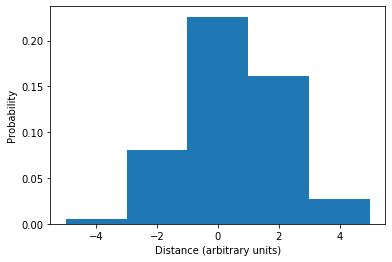

In [108]:
fig, ax = plt.subplots()
ax.hist(mc.results,bins=5, density=True, histtype='bar')
ax.set_ylabel('Probability')
ax.set_xlabel('Distance (arbitrary units)')

Text(0.5, 0, 'Distance (arbitrary units)')

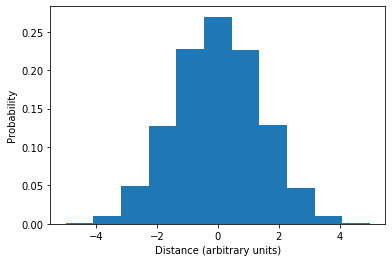

In [109]:
fig, ax = plt.subplots()
ax.hist(mc.results, bins=11,density=True, histtype='bar')
ax.set_ylabel('Probability')
ax.set_xlabel('Distance (arbitrary units)')